> # Select data vectors by similarity using a metric score

> Marcos Duarte  
> [Laboratory of Biomechanics and Motor Control](https://bmclab.pesquisa.ufabc.edu.br/)  
> Federal University of ABC, Brazil

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, r'./../functions')
from simila import similarity, mse

%load_ext autoreload
%autoreload 2

%load_ext line_profiler
%load_ext watermark
%watermark -u -t -d -m -v --iversions

np.set_printoptions(precision=3)

Last updated: 2023-08-07 19:49:46

Python implementation: CPython
Python version       : 3.11.4
IPython version      : 8.14.0

Compiler    : GCC 12.2.0
OS          : Linux
Release     : 6.2.0-26-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 16
Architecture: 64bit

sys       : 3.11.4 | packaged by conda-forge | (main, Jun 10 2023, 18:08:17) [GCC 12.2.0]
matplotlib: 3.7.2
numpy     : 1.25.2



In [2]:
help(similarity)

Help on function similarity in module simila:

similarity(y: numpy.ndarray, axis1: int = 0, axis2: int = 1, threshold: float = 0, nmin: int = 3, repeat: bool = True, metric: Callable = <function mse at 0x7f9497f963e0>, drop=True, msg: bool = True, **kwargs: Callable) -> tuple[numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray]
    Select vectors in numpy.ndarray by their similarity using a metric score.
    
    For example, if `y` is a 2-D numpy.ndarray, with shape (n, m), `axis1`=0
    (n is the number of rows) and `axis2`=1 (m is the number of columns), this
    function will select the vectors along the columns, that are more similar
    to a `central` statistics of `y` or to a `target` using a `metric` score.
    The metric score can be calculated repeatedly until all selected vectors
    have a `metric` score not greater than a `threshold`, but the minimum
    number of vectors to keep or the maximum number of vectors to discard
    can be specified with parameter `nmin`.

In [3]:
help(mse)

Help on function mse in module simila:

mse(y: numpy.ndarray, target: numpy.ndarray | None = None, axis1: int = 0, axis2: int = 1, central: Callable = <function nanmedian at 0x7f954023a3b0>, normalization: Callable = <function nanmedian at 0x7f954023a3b0>) -> numpy.ndarray
    Mean Squared Error of `y` w.r.t. `target` or `central` along `axis2` at `axis1`.
    
    Parameters
    ----------
    y : numpy.ndarray
        At least a 2-D numpy.ndarray of data for the calculation of mean squared
        error w.r.t. to a `target` or a `central` statistics of the data.
    target : 1-D numpy.ndarray of length `axis1`, optional, default = None
        Reference value to calculate the mean squared error of `y` w.r.t. this
        vector. If it is None, the mse value will be calculated w.r.t. a `central`
        calculated along `axis2` of `y`.
    axis1 : integer, optional, default = 0
        Axis of `y` for which the mse will be calculated at each value.
    axis2 : integer, optional, defau

### Example

Calculated threshold: 3.0
Vectors discarded (dimension 1, n=5): [8 0 4 6 2]
Calculated threshold: 3.0
Vectors discarded (dimension 1, n=4): [8 0 4 6]


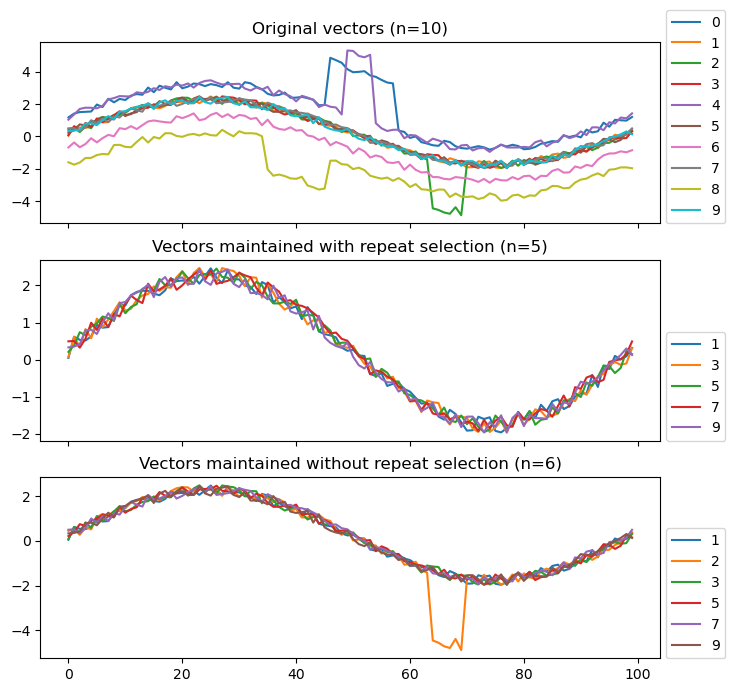

In [4]:
>>> import matplotlib.pyplot as plt
>>> rng = np.random.default_rng()
>>> t, n = 100, 10
>>> y = rng.random((t, n)) / 2
>>> y +=  np.atleast_2d(2*np.sin(2*np.pi*np.linspace(0, 1, t))).T
>>> for i in range(0, n, 2):
>>>    j = rng.integers(t-20)
>>>    p = rng.integers(20)
>>>    y[j:j+p, i] = y[j:j+p, i] + rng.integers(10) - 5
>>>    y[:, i] += rng.integers(4) - 2
>>> ysr, ikeptr, inotkeptr, scoresr = similarity(y)
>>> ysn, ikeptn, inotkeptn, scoresn = similarity(y, repeat=False)
>>> fig, axs = plt.subplots(3, 1, sharex=True, figsize=(8, 8))
>>> axs[0].plot(y, label=list(range(n)))
>>> axs[0].legend(loc=(1.01, 0))
>>> axs[0].set_title(f'Original vectors (n={n})')
>>> axs[1].plot(ysr, label= ikeptr.tolist())
>>> axs[1].set_title(f'Vectors maintained with repeat selection (n={len(ikeptr)})')
>>> axs[1].legend(loc=(1.01, 0))
>>> axs[2].plot(ysn, label= ikeptn.tolist())
>>> axs[2].set_title(f'Vectors maintained without repeat selection (n={len(ikeptn)})')
>>> axs[2].legend(loc=(1.01, 0))
>>> plt.show()

In [5]:
ys, ikept, inotkept, scores = similarity(y, threshold=0, nmin=3, repeat=True, metric=mse,
                                         msg=1, central=np.nanmedian, normalization=np.nanmedian)

Calculated threshold: 3.0
Vectors discarded (dimension 1, n=5): [8 0 4 6 2]


In [6]:
ys.shape

(100, 5)

In [7]:
ikept

array([1, 3, 5, 7, 9])

In [8]:
inotkept

array([8, 0, 4, 6, 2])

In [9]:
scores

array([[8.976e+00, 6.592e-02, 1.931e+00, 6.030e-02, 7.304e+00, 6.484e-02,
        3.480e+00, 5.584e-02, 1.827e+01, 6.865e-02],
       [1.110e+02, 8.942e-01, 2.497e+01, 9.247e-01, 9.007e+01, 8.748e-01,
        4.689e+01, 7.530e-01,       nan, 1.000e+00],
       [      nan, 9.797e-01, 2.870e+01, 8.962e-01, 1.085e+02, 9.636e-01,
        5.172e+01, 8.299e-01,       nan, 1.020e+00],
       [      nan, 1.009e+00, 2.672e+01, 8.178e-01,       nan, 1.000e+00,
        4.593e+01, 8.822e-01,       nan, 9.687e-01],
       [      nan, 1.008e+00, 2.954e+01, 9.223e-01,       nan, 9.917e-01,
              nan, 8.541e-01,       nan, 1.050e+00],
       [      nan, 1.076e+00,       nan, 8.979e-01,       nan, 1.045e+00,
              nan, 8.809e-01,       nan, 1.000e+00]])

In [10]:
ys, ikept, inotkept, scores = similarity(y, threshold=0, nmin=3, repeat=True, metric=mse,
                                         drop=False, msg=True, central=np.nanmedian, normalization=np.nanmedian)

Calculated threshold: 3.0
Vectors discarded (dimension 1, n=5): [8 0 4 6 2]


In [11]:
ys.shape

(100, 10)

In [12]:
ys, ikept, inotkept, scores = similarity(y, threshold=0, nmin=3, repeat=False, metric=mse,
                                         msg=True, central=np.nanmedian, normalization=np.nanmedian)

Calculated threshold: 3.0
Vectors discarded (dimension 1, n=4): [8 0 4 6]


## Function profiling

In [13]:
%%timeit
ys, ikept, inotkept, score_all = similarity(y, repeat=True, msg=False)

2.27 ms ± 34.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
%%timeit
ys, ikept, inotkept, score_all = similarity(y, repeat=False, msg=False)

857 µs ± 2.72 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


The computation of the metric score (in the example above, `mse`) takes 86% of the funtion time. Let's look on that.

In [15]:
%%timeit
score = mse(y, central=np.nanmedian, normalization=np.nanmedian)

322 µs ± 912 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [16]:
%%timeit
score = mse(y, central=np.nanmean, normalization=np.nanmean)

76.7 µs ± 646 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Using `median` to calculate statistics slows down the code by about 4 times compared to using `mean`.

In [17]:
%lprun -f similarity similarity(y, msg=False)

Timer unit: 1e-09 s

Total time: 0.00514784 s
File: /home/marcos/adrive/Python/BMC/notebooks/./../functions/simila.py
Function: similarity at line 87

Line #      Hits         Time  Per Hit   % Time  Line Contents
    87                                           def similarity(y: np.ndarray, axis1: int = 0, axis2: int = 1, threshold: float = 0,
    88                                                          nmin: int = 3, repeat: bool = True, metric: Callable = mse,
    89                                                          drop=True, msg: bool = True, **kwargs: Callable
    90                                                          ) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    91                                           
    92                                               """Select vectors in numpy.ndarray by their similarity using a metric score.
    93                                           
    94                                               For exampl

## Function `similarity`

In [19]:
# %load ./../functions/simila.py
"""Select vectors in numpy.ndarray by their similarity using a metric score.
"""

import logging
from typing import Callable
import numpy as np

__author__ = 'Marcos Duarte, https://github.com/demotu/BMC'
__version__ = 'simila.py v.1.0.0 20123/07/31'
__license__ = "MIT"

# set logger and configure it not to confuse with matplotlib debug messages
logger = logging.getLogger(__name__)
logger.setLevel(20)  # 0: NOTSET, 10: DEBUG, 20: INFO, 30: WARNING, 40: ERROR, 50: CRITICAL
ch = logging.StreamHandler()
formatter = logging.Formatter('{name}: {levelname}: {message}', style='{')
ch.setFormatter(formatter)
logger.addHandler(ch)


def mse(y: np.ndarray, target: np.ndarray | None = None, axis1: int = 0, axis2: int = 1,
        central: Callable = np.nanmedian, normalization: Callable = np.nanmedian
        ) -> np.ndarray:
    """Mean Squared Error of `y` w.r.t. `target` or `central` along `axis2` at `axis1`.

    Parameters
    ----------
    y : numpy.ndarray
        At least a 2-D numpy.ndarray of data for the calculation of mean squared
        error w.r.t. to a `target` or a `central` statistics of the data.
    target : 1-D numpy.ndarray of length `axis1`, optional, default = None
        Reference value to calculate the mean squared error of `y` w.r.t. this
        vector. If it is None, the mse value will be calculated w.r.t. a `central`
        calculated along `axis2` of `y`.
    axis1 : integer, optional, default = 0
        Axis of `y` for which the mse will be calculated at each value.
    axis2 : integer, optional, default = 1
        Axis of `y` along which the `central` statistics might be calculated or
        along which the target will be subtracted.
    central : Python function, optional, default = np.nanmedian
        Function to calculate statistics on `y` w.r.t. mse is computed.
    normalization : Python function, optional, default = np.nanmedian
        Function to normalize the calculated mse values

    Returns
    -------
    score : numpy.ndarray
        Mean Squared Error values

    References
    ----------
    .. [1] https://nbviewer.org/github/BMClab/BMC/blob/master/notebooks/Similarity.ipynb

    Examples
    --------
    >>> import numpy as np
    >>> rng = np.random.default_rng()
    >>> y = rng.random((100, 10))
    >>> y = y + np.atleast_2d(np.sin(2*np.pi*np.linspace(0, 1, 100))).T
    >>> mse(y, axis1=0, axis2=1, central=np.nanmedian, normalization=np.nanmedian)

    Version history
    ---------------
    '1.0.0':
        First release version
    """

    logger.debug('mse...')

    score: np.ndarray = np.empty((y.shape[axis2]), dtype=float)
    score.fill(np.nan)
    idx: np.ndarray = np.where(~np.all(np.isnan(y), axis=axis1))[0]
    y = y.swapaxes(0, axis2)[idx, ...].swapaxes(0, axis2)  # faster than .take
    if target is not None:
        logger.debug('target shape: %s', target.shape)
        score[idx] = np.nanmean((y - target)**2, axis=axis1)
    else:
        score[idx] = np.nanmean((y - central(y, axis=axis2, keepdims=True))**2, axis=axis1)

    if normalization is not None:
        score = score/normalization(score)
    logger.debug('idx: %s, score: %s', idx, score)

    return score


def similarity(y: np.ndarray, axis1: int = 0, axis2: int = 1, threshold: float = 0,
               nmin: int = 3, repeat: bool = True, metric: Callable = mse,
               drop=True, msg: bool = True, **kwargs: Callable
               ) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:

    """Select vectors in numpy.ndarray by their similarity using a metric score.

    For example, if `y` is a 2-D numpy.ndarray, with shape (n, m), `axis1`=0
    (n is the number of rows) and `axis2`=1 (m is the number of columns), this
    function will select the vectors along the columns, that are more similar
    to a `central` statistics of `y` or to a `target` using a `metric` score.
    The metric score can be calculated repeatedly until all selected vectors
    have a `metric` score not greater than a `threshold`, but the minimum
    number of vectors to keep or the maximum number of vectors to discard
    can be specified with parameter `nmin`.

    The default `metric` and target are the mean squared error (`mse`) of `y`
    w.r.t. to the median of `y` along `axis2`. The `mse` metric is equivalent
    to the squared Euclidean distance and it is prefered because it
    penalizes largest differences more than the Euclidian distance. But any
    other `metric` that can be calculated with a function can be used.

    A possible use of this function is to discard the time-series data from bad
    trials (treated as outliers) stored in a 2-D array (each trial as a column
    and instants as rows) where the criterion is the similarity of the trial
    w.r.t. the median trial (the median statistics is more robust to remove
    outliers than the mean in case there are very bad trials). After the bad
    trials are discarded, the mean of all trials could then be calculated more
    reliablly.

    Parameters
    ----------
    y : numpy.ndarray
        Array for the calculation of similarity (defined by a `metric`) of its
        vectors w.r.t. to a `target` or a `central` statistics of `y`.
    axis1 : integer, optional, default = 0
        Axis of `y` for which the `metric` will be calculated at each value and
        possibly averaged in the `metric` calculation.
    axis2 : integer, optional, default = 1
        Axis of `y` along which the different vectors are going to be compared
        with the `threshold` for their similarity (using their `metric` score).
    threshold : float, optional, default = 0
        If greater than 0, vector with `metric` score above this value will be
        discarded. If 0, threshold will be automatically calculated as the
        minimum of [qs[2] + 1.5*(qs[2]-qs[0]), score[-2], 3], where qs are the
        quantiles and score[-2] is the before-last largest score of `metric`
        among vectors calculated at the first time, not updated by the `repeat`
        option.
    nmin : integer, optional, default = 3
        If greater than 0, minumum number of vectors to keep.
        If lower than 0, maximum number of vectors to discard.
    repeat :bool, optional, default = True
        Whether to calculate similarity `metric` repeatedly, updating the
        score calculation each time a vector is discarded.
        With `repeat` True, the output `scores` will contain at each row
        the updated score values for the used `metric` for each data vector.
        The first row will contain the calculated original scores before any
        vector was discarded. On the next equent rows, the vectors discarded
        are represented by NaN values and the kept vectors by their updated
        scores.
        The last row will contain the updated scores of the final vectors kept.
        With the `repeat` False, the comparison of score values with
        `threshold` are made only once and vectors are discarded accordingly at
        once. In this case, the output `scores` will contain only two rows, the
        first row will contain the calculated original scores before any
        vectors were discarded. At the second row, the vectors discarded are
        represented with NaN values and the kept vectors by their updated
        scores.
    metric : optional, default=mse
        Function to use as metric to compute similarity.
    drop : bool, optional, default = True
        Whether to drop (delete) the discarded vectors from `y` in the output.
        If False, the values of the vectors discarded will be replaced by nans
        and the returned array will have the same dimensions as the original
        array.
    msg : bool, optional, default = True
        Whether to print some messages.
    kwargs : optional
        Options for the metric function (e.g., see `mse` function).

    Returns
    -------
    y : numpy.ndarray
        Array similar to input `y` but with vectors discarded (deleted) if
        option `drop` is True or with all values of vectors discarded replaced
        by nans if option `drop` is False.
    ikept : numpy.ndarray
        Indexes of kept vectors.
    inotkept : numpy.ndarray
        Indexes of not kept (discarded or replaced by nan) vectors.
    scores : 2-D numpy.ndarray
        Metric score values of each vector (as columns) for each round of
        vector selection (one row per round plus the final values).

    References
    ----------
    .. [1] https://nbviewer.org/github/BMClab/BMC/blob/master/notebooks/Similarity.ipynb

    Examples
    --------
    >>> import matplotlib.pyplot as plt
    >>> rng = np.random.default_rng()
    >>> t, n = 100, 10
    >>> y = rng.random((t, n)) / 2
    >>> y = y + np.atleast_2d(2*np.sin(2*np.pi*np.linspace(0, 1, t))).T
    >>> for i in range(0, n, 2):
    >>>    j = rng.integers(t-20)
    >>>    p = rng.integers(20)
    >>>    y[j:j+p, i] = y[j:j+p, i] + rng.integers(10) - 5
    >>>    y[:, i] += rng.integers(4) - 2
    >>> ysr, ikeptr, inotkeptr, scoresr = similarity(y)
    >>> ysn, ikeptn, inotkeptn, scoresn = similarity(y, repeat=False)
    >>> fig, axs = plt.subplots(3, 1, sharex=True, figsize=(8, 8))
    >>> axs[0].plot(y, label=list(range(n)))
    >>> axs[0].legend(loc=(1.01, 0))
    >>> axs[0].set_title(f'Original vectors (n={n})')
    >>> axs[1].plot(ysr, label= ikeptr.tolist())
    >>> axs[1].set_title(f'Vectors maintained with repeat selection (n={len(ikeptr)})')
    >>> axs[1].legend(loc=(1.01, 0))
    >>> axs[2].plot(ysn, label= ikeptn.tolist())
    >>> axs[2].set_title(f'Vectors maintained without repeat selection (n={len(ikeptn)})')
    >>> axs[2].legend(loc=(1.01, 0))
    >>> plt.show()

    Version history
    ---------------
    '1.0.0':
        First release version
    """

    logger.debug('Similarity...')

    if y.ndim < 2:
        raise ValueError('The input array must be at least a 2-D array.')
    y = y.copy()
    score: np.ndarray = metric(y, axis1=axis1, axis2=axis2, **kwargs)
    scores: np.ndarray = np.atleast_2d(score)
    ikept: np.ndarray = np.where(~np.isnan(score))[0]  # indexes of kept vectors
    inotkept: np.ndarray = np.where(np.isnan(score))[0]  # indexes of discarded vectors
    idx: np.ndarray = np.argsort(score)
    score = score[idx]
    nkept: int = np.count_nonzero(~np.isnan(score))  # number of kept vectors
    if nkept < 3:
        logger.debug('nkept: %s', nkept)
        raise ValueError('The input array must have at least 3 valid vectors.')
    if nmin < 0:
        nmin = np.max([3, nkept + nmin])
    if threshold == 0:  # automatic threshold calculation
        qs: np.ndarray = np.nanquantile(a=score, q=[.25, .50, .75])
        threshold = np.min([qs[2] + 1.5*(qs[2]-qs[0]), score[-2], 3.])
        if msg:
            print(f'Calculated threshold: {threshold}')

    if not repeat:  # discard all vectors at once
        idx2: np.ndarray = np.nonzero(score > threshold)[0]  # vectors to discard
        if len(idx2) > 0:
            if nkept > nmin:  # keep at least nmin vectors
                inotkept = np.r_[inotkept, idx[idx2[-(y.shape[axis2] - nmin):]][::-1]]
                y.swapaxes(0, axis2)[inotkept, ...] = np.nan
                score = metric(y, axis1=axis1, axis2=axis2, **kwargs)
                scores = np.vstack((scores, score))
                logger.debug('not repeat - score: %s', score)
    else:  # discard vector with largest updated score one by one
        while nkept > nmin and score[nkept-1] > threshold:
            inotkept = np.r_[inotkept, idx[nkept-1]]
            y.swapaxes(0, axis2)[inotkept[-1], ...] = np.nan
            score = metric(y, axis1=axis1, axis2=axis2, **kwargs)
            scores = np.vstack((scores, score))
            idx = np.argsort(score)
            score = score[idx]
            nkept = nkept - 1
            logger.debug('repeat - nkept: %s, score: %s', nkept, score)

    if len(inotkept):
        ikept = np.setdiff1d(ikept, inotkept)
        if drop:
            y = y.swapaxes(0, axis2)[ikept, ...].swapaxes(0, axis2)
        if msg:
            print(
                  f'Vectors discarded (dimension {axis2}, n={len(inotkept)}): {inotkept}')

    return y, ikept, inotkept, scores
